In [ ]:
import pandas as pd

data = pd.ExcelFile('/content/Book1.xlsx')

In [ ]:
# Load the data from the first sheet to inspect its structure and contents
df = data.parse('Sheet1')

# Display the first few rows of the dataset to understand its structure and contents
df.head()

,Title,Budget,HOA,HOD,THEATRE OR OTT,PREFERENCE,TIME,RATING,Year,Certificates,Genre,Director,Star Cast,MetaScore
0,Mission: Impossible - Dead Reckoning Part One,291.0,20,4,Theatrical,T,"Summer (July 12, 2023)",7.7,2023,PG-13,Action,Christopher McQuarrie,Tom Cruise,81.0
1,Rebel Moon - Part Two: The Scargiver,125.0,2,5,OTT,O,"Spring (April 19, 2024)",5.2,2024,PG-13,Action,Zack Snyder,Zack Snyder,35.0
2,Borderlands,115.0,10,2,Theatrical,T,"Summer (August 9, 2024)",7.1,2024,R,Action,Eli Roth,Eli Roth,66.9
3,Descendants: The Rise of Red,15.0,2,1,OTT,T,"Summer (July 12, 2024)",7.1,2024,TV-G,Action,Jennifer Phang,Rita OraJoshua ColleyChina Anne McClain,66.9
4,Wish,200.0,1,3,Theatrical,O,"Fall(November 22,2023)",5.6,2023,PG,Animation,Chris Buck,Jennifer LeeAllison MooreChris Buck,47.0


In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Check data types of each column
data_types = df.dtypes

# Display results for missing values and data types
missing_values, data_types


(Title             0
 Budget            0
 HOA               0
 HOD               0
 THEATRE OR OTT    0
 PREFERENCE        0
 TIME              0
 RATING            0
 Year              0
 Certificates      0
 Genre             0
 Director          0
 Star Cast         0
 MetaScore         0
 dtype: int64,
 Title              object
 Budget            float64
 HOA                 int64
 HOD                 int64
 THEATRE OR OTT     object
 PREFERENCE         object
 TIME               object
 RATING            float64
 Year                int64
 Certificates       object
 Genre              object
 Director           object
 Star Cast          object
 MetaScore         float64
 dtype: object)

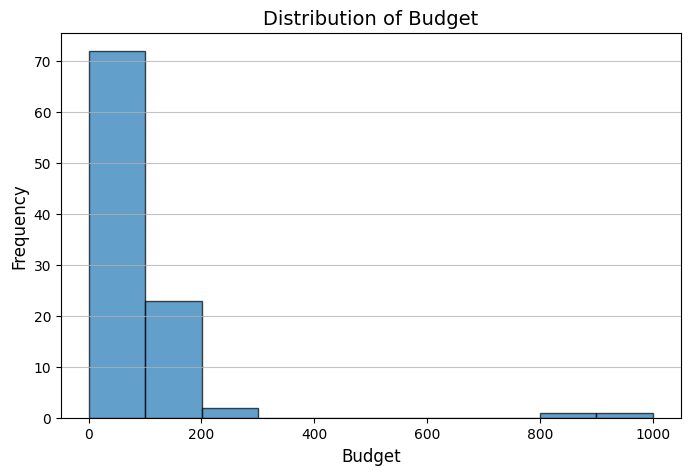

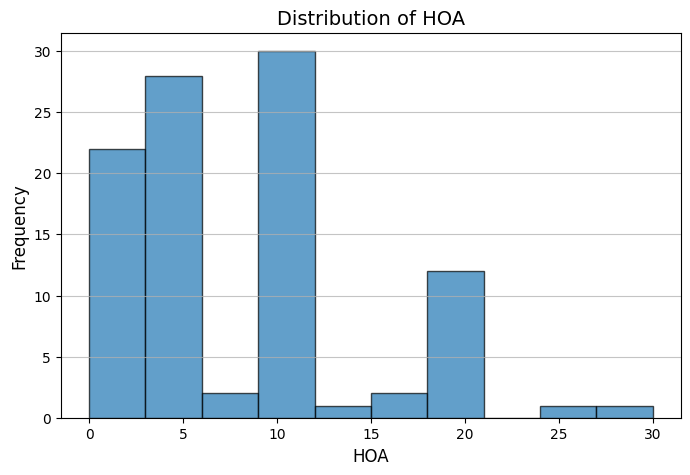

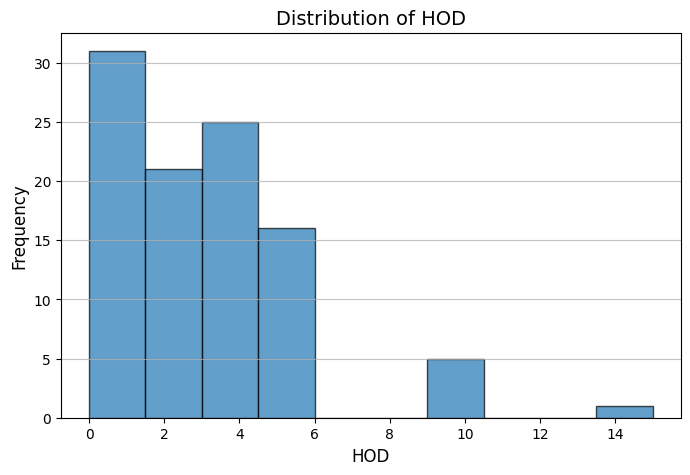

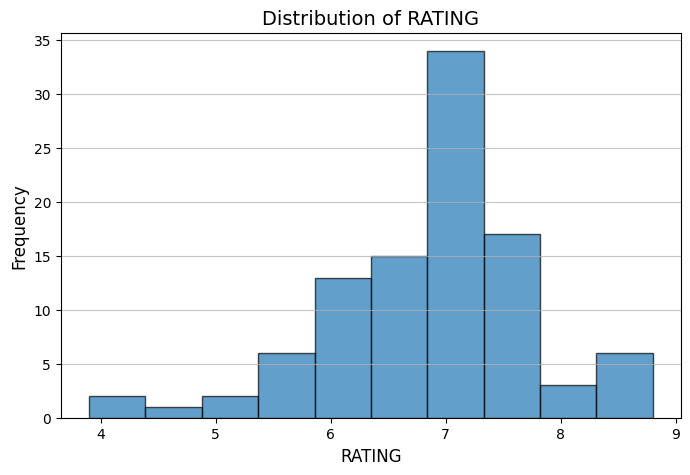

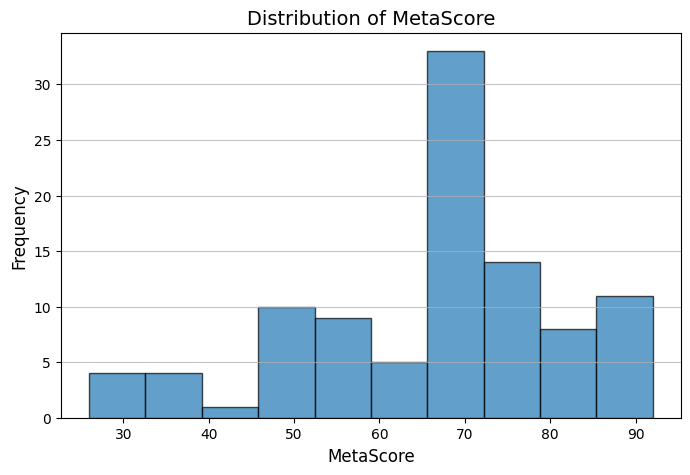

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of numerical variables
numerical_columns = ['Budget', 'HOA', 'HOD', 'RATING', 'MetaScore']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=10, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [ ]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to 'Budget' and 'HOD' columns
filtered_df = remove_outliers_iqr(df, 'Budget')
filtered_df = remove_outliers_iqr(filtered_df, 'HOD')

# Display the size of the dataset before and after outlier removal
original_size = df.shape[0]
filtered_size = filtered_df.shape[0]

original_size, filtered_size

(99, 90)

In [ ]:
filtered_df.head()


,Title,Budget,HOA,HOD,THEATRE OR OTT,PREFERENCE,TIME,RATING,Year,Certificates,Genre,Director,Star Cast,MetaScore
1,Rebel Moon - Part Two: The Scargiver,125.0,2,5,OTT,O,"Spring (April 19, 2024)",5.2,2024,PG-13,Action,Zack Snyder,Zack Snyder,35.0
2,Borderlands,115.0,10,2,Theatrical,T,"Summer (August 9, 2024)",7.1,2024,R,Action,Eli Roth,Eli Roth,66.9
3,Descendants: The Rise of Red,15.0,2,1,OTT,T,"Summer (July 12, 2024)",7.1,2024,TV-G,Action,Jennifer Phang,Rita OraJoshua ColleyChina Anne McClain,66.9
4,Wish,200.0,1,3,Theatrical,O,"Fall(November 22,2023)",5.6,2023,PG,Animation,Chris Buck,Jennifer LeeAllison MooreChris Buck,47.0
5,Rebel Moon - Part One: A Child of Fire,125.0,2,5,OTT,O,"Winter(December 22,2023)",5.6,2023,PG-13,Action,Zack Snyder,Zack SnyderKurt JohnstadShay Hatten,31.0


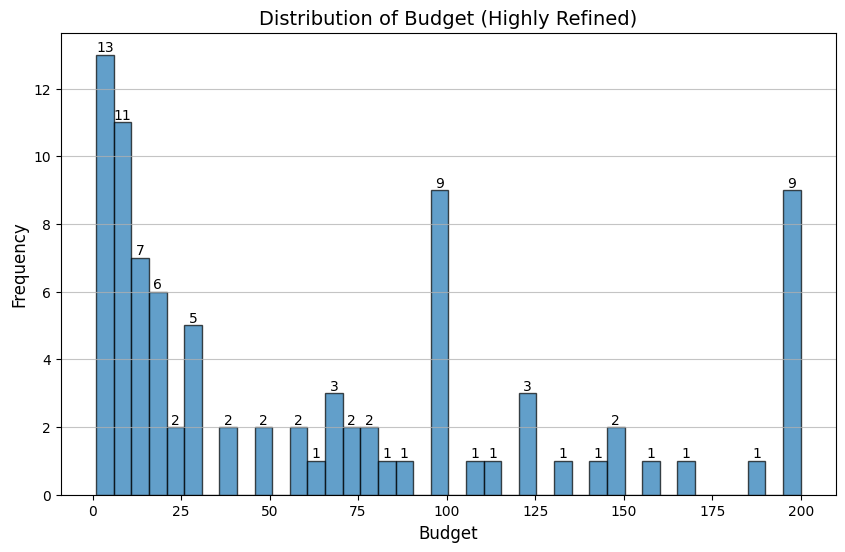

In [ ]:
# Re-visualize the 'Budget' distribution with more bins for higher granularity
plt.figure(figsize=(10, 6))
counts, bins, bars = plt.hist(filtered_df['Budget'], bins=40, edgecolor='k', alpha=0.7)
plt.title('Distribution of Budget (Highly Refined)', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Add labels above the bars
for count, bar in zip(counts, bars):
    height = bar.get_height()
    if height > 0:  # Only label non-zero bars
        plt.text(bar.get_x() + bar.get_width() / 2, height, int(count),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.show()

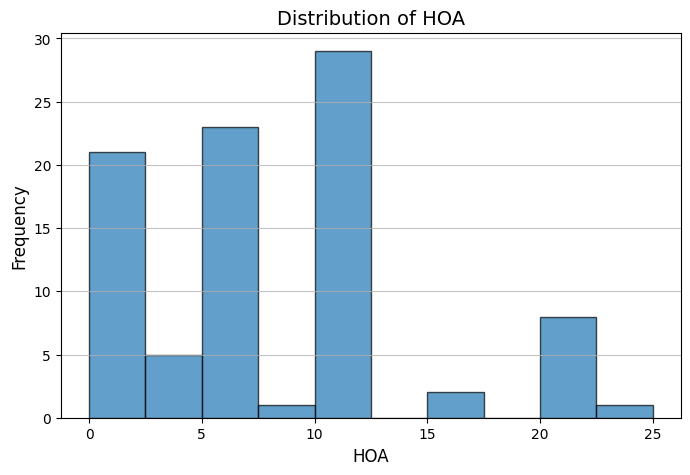

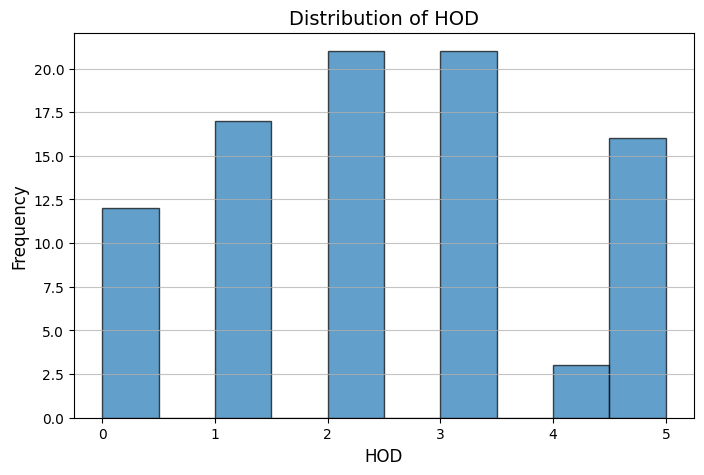

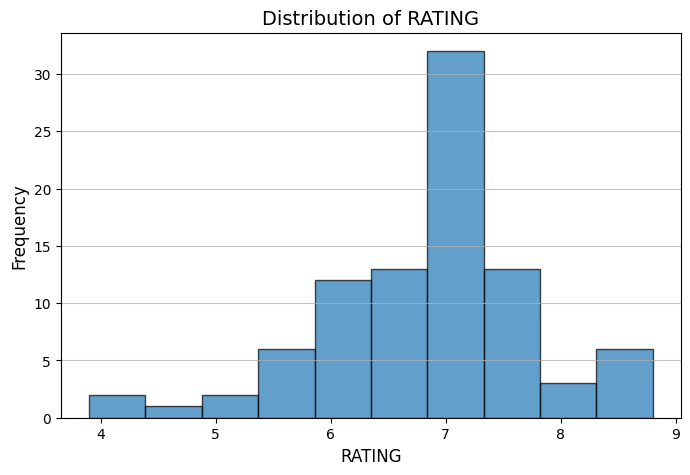

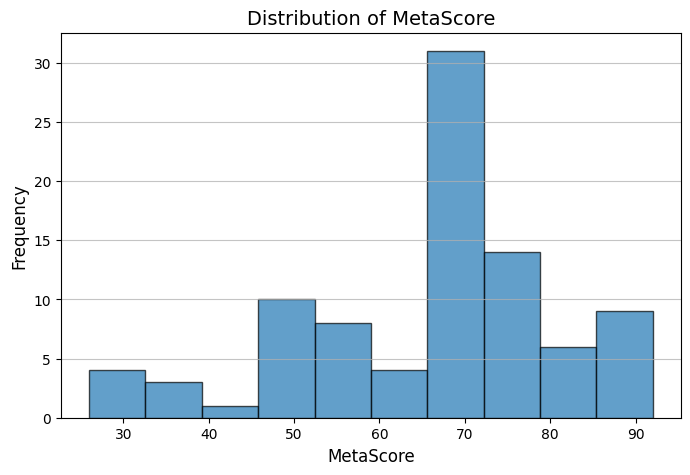

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of numerical variables
numerical_columns = ['HOA', 'HOD', 'RATING', 'MetaScore']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(filtered_df[column], bins=10, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

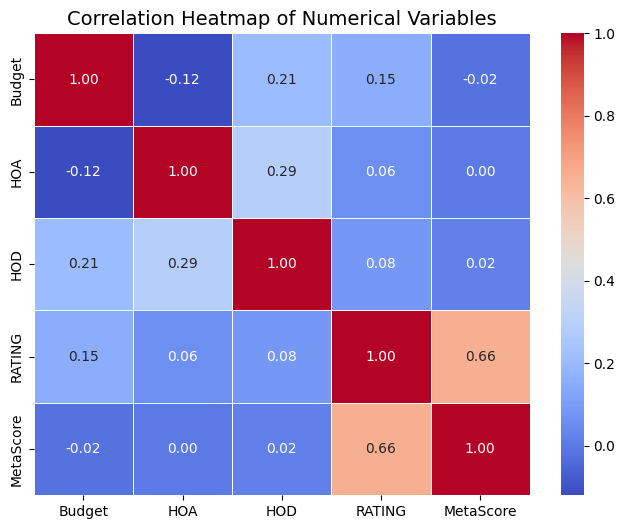

In [ ]:
import seaborn as sns

# Compute correlation matrix for numerical variables
numerical_cols = ['Budget', 'HOA', 'HOD', 'RATING', 'MetaScore']
correlation_matrix = filtered_df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.show()

In [ ]:
# Categorize the 'TIME' column into seasons for easier analysis
def categorize_time(value):
    if "Summer" in value:
        return "Summer"
    elif "Spring" in value:
        return "Spring"
    elif "Fall" in value:
        return "Fall"
    elif "Winter" in value:
        return "Winter"
    else:
        return "Unknown"

# Apply the function to categorize 'TIME'
filtered_df['Season'] = filtered_df['TIME '].apply(categorize_time)

# Check the updated dataframe to confirm the categorization
filtered_df[['TIME ', 'Season']].head()


,TIME,Season
1,"Spring (April 19, 2024)",Spring
2,"Summer (August 9, 2024)",Summer
3,"Summer (July 12, 2024)",Summer
4,"Fall(November 22,2023)",Fall
5,"Winter(December 22,2023)",Winter


In [ ]:
# Drop the original 'TIME' column and retain the new 'Season' column
filtered_df.drop(columns=['TIME '], inplace=True)
filtered_df.drop(columns=['Title'], inplace=True)

In [ ]:
filtered_df.drop(columns=['Director'], inplace=True)
filtered_df.drop(columns=['Star Cast'], inplace=True)

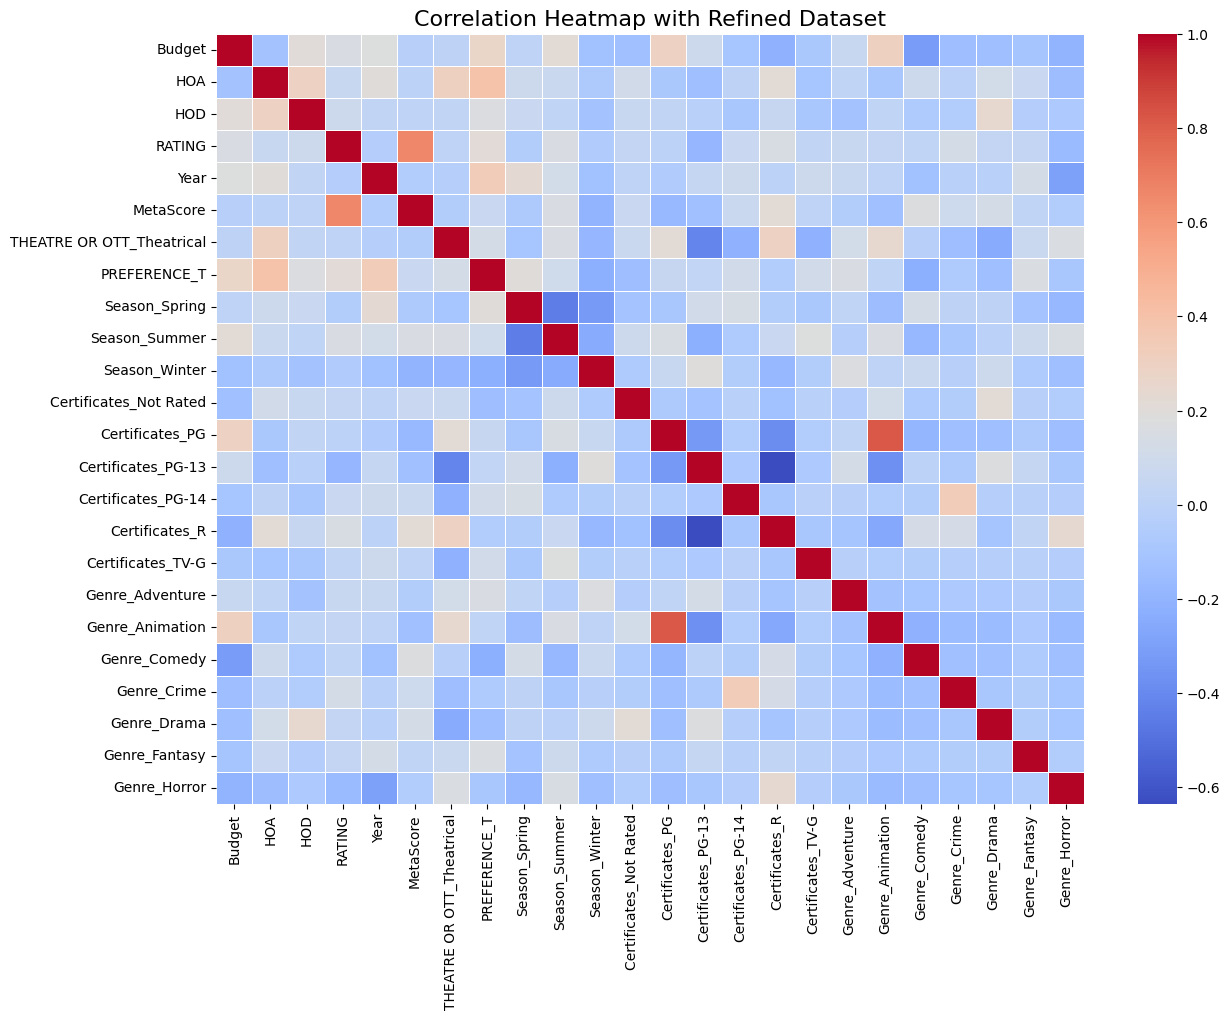

In [ ]:
# Perform one-hot encoding on the updated categorical variables including 'Season'
encoded_df = pd.get_dummies(filtered_df, columns=['THEATRE OR OTT', 'PREFERENCE', 'Season', 'Certificates', 'Genre'], drop_first=True)

# Compute the correlation matrix on the refined dataset
refined_correlation_matrix = encoded_df.corr()

# Visualize the refined correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(refined_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Refined Dataset', fontsize=16)
plt.show()

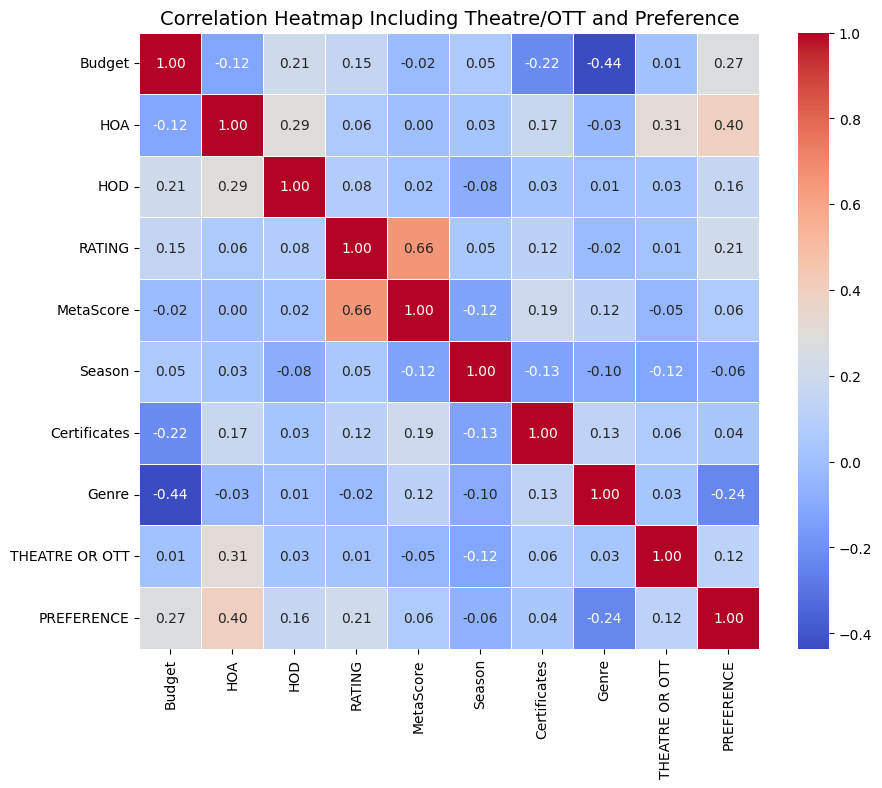

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for 'THEATRE OR OTT' and 'PREFERENCE'
filtered_df['THEATRE OR OTT'] = label_encoder.fit_transform(filtered_df['THEATRE OR OTT'])
filtered_df['PREFERENCE'] = label_encoder.fit_transform(filtered_df['PREFERENCE'])
filtered_df['Season'] = label_encoder.fit_transform(filtered_df['Season'])
filtered_df['Certificates'] = label_encoder.fit_transform(filtered_df['Certificates'])
filtered_df['Genre'] = label_encoder.fit_transform(filtered_df['Genre'])

# Update correlation matrix with additional variables
final_correlation_matrix = filtered_df[['Budget', 'HOA', 'HOD', 'RATING', 'MetaScore',
                                             'Season', 'Certificates', 'Genre', 'THEATRE OR OTT', 'PREFERENCE']].corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(final_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Including Theatre/OTT and Preference', fontsize=14)
plt.show()

Budget -

<ipython-input-15-6393ecc5ebf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='THEATRE OR OTT', y='HOA', data=filtered_df, palette='coolwarm')


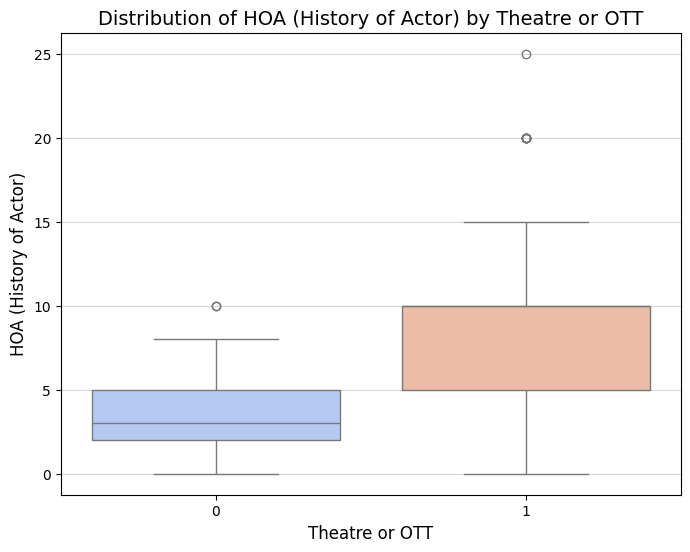

In [ ]:
# Visualize the relationship between HOA (History of Actor) and THEATRE OR OTT
plt.figure(figsize=(8, 6))
sns.boxplot(x='THEATRE OR OTT', y='HOA', data=filtered_df, palette='coolwarm')
plt.title('Distribution of HOA (History of Actor) by Theatre or OTT', fontsize=14)
plt.xlabel('Theatre or OTT', fontsize=12)
plt.ylabel('HOA (History of Actor)', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()


The boxplot visualizes the distribution of HOA (History of Actor) for Theatre or OTT:

Theatrical Releases (1): Generally have actors with higher experience (HOA), with a wider spread and higher outliers.
OTT Releases (0): Tend to involve less experienced actors, with a lower median and fewer outliers.

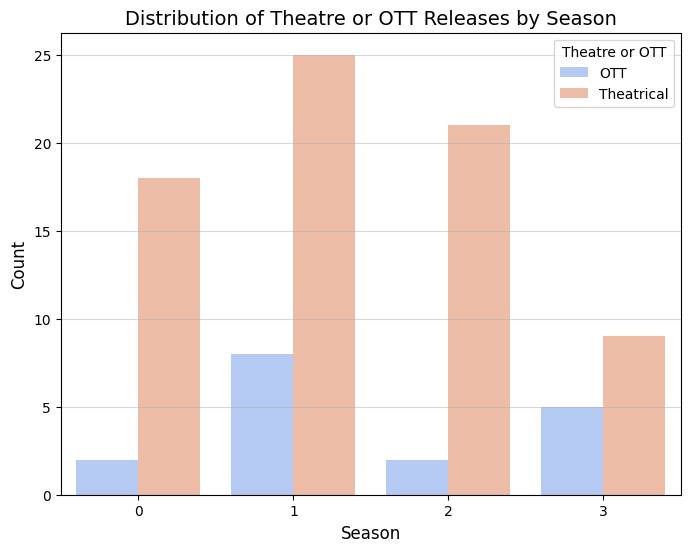

In [ ]:
# Corrected Visualization: Count of Theatre or OTT by Season
plt.figure(figsize=(8, 6))
sns.countplot(x='Season', hue='THEATRE OR OTT', data=filtered_df, palette='coolwarm')
plt.title('Distribution of Theatre or OTT Releases by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Theatre or OTT', labels=['OTT', 'Theatrical'])
plt.grid(axis='y', alpha=0.5)
plt.show()


Key Insights:
The count plot reveals how Seasonal Trends impact Theatre vs. OTT releases:

Theatrical releases dominate across all seasons, especially in the Summer (Season 1) and Fall (Season 2).
OTT releases are lower across seasons but show slight increases in specific periods like Winter

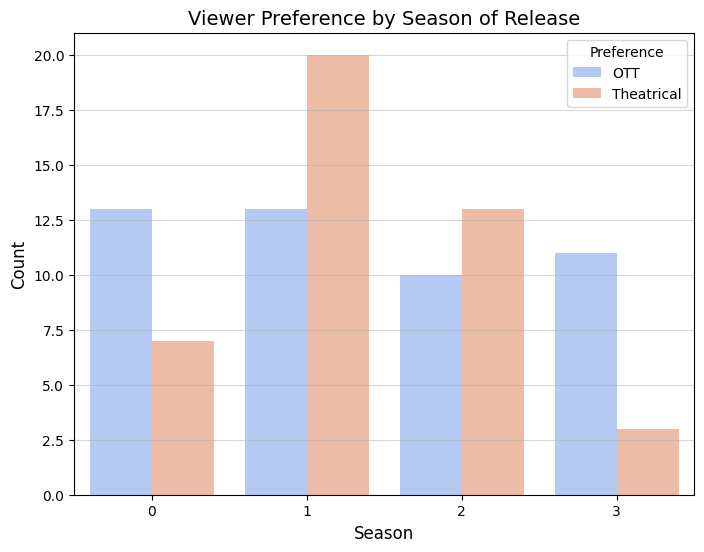

In [ ]:
# Visualize the relationship between Preference and Season using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Season', hue='PREFERENCE', data=filtered_df, palette='coolwarm')
plt.title('Viewer Preference by Season of Release', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Preference', labels=['OTT', 'Theatrical'])
plt.grid(axis='y', alpha=0.5)
plt.show()


<ipython-input-18-1c8ce80b91e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='THEATRE OR OTT', y='Budget', data=filtered_df, palette='coolwarm')


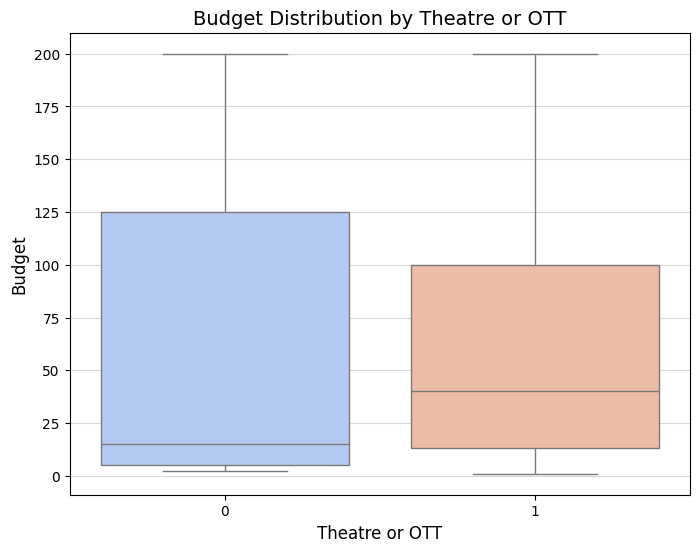

In [ ]:
# Visualize the relationship between Budget and Theatre or OTT
plt.figure(figsize=(8, 6))
sns.boxplot(x='THEATRE OR OTT', y='Budget', data=filtered_df, palette='coolwarm')
plt.title('Budget Distribution by Theatre or OTT', fontsize=14)
plt.xlabel('Theatre or OTT', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()



Summer and Fall Releases:
Theatrical preferences dominate these seasons, aligning with traditional peak release times for big-budget movies.
Winter and Spring Releases:
OTT preferences are relatively more balanced or even higher, indicating that these seasons are popular for direct-to-streaming releases.

Theatrical releases (1) tend to have higher budgets, with a broader range and higher median compared to OTT releases (0), reflecting their correlation (0.31).

<ipython-input-19-ec5e1b4dc8ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PREFERENCE', y='Budget', data=filtered_df, palette='coolwarm')


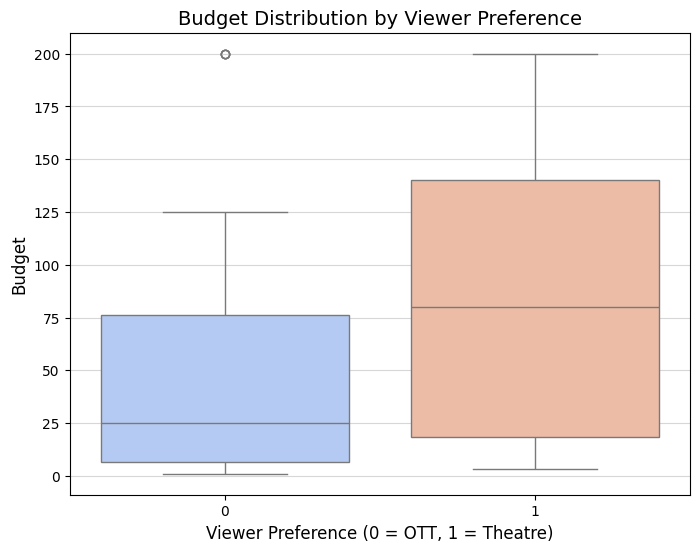

In [ ]:
# Visualize the relationship between Budget and Preference using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='PREFERENCE', y='Budget', data=filtered_df, palette='coolwarm')
plt.title('Budget Distribution by Viewer Preference', fontsize=14)
plt.xlabel('Viewer Preference (0 = OTT, 1 = Theatre)', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()


Key Insights:
The boxplot shows the relationship between Budget and Viewer Preference:

Theatrical Preference (1): Movies preferred for theatrical viewing have a significantly higher median budget, with a wider range and notable outliers.
OTT Preference (0): Movies preferred for OTT platforms generally have lower budgets, with a tighter budget distribution.

<ipython-input-20-53fadd114ab8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Budget', data=filtered_df, palette='coolwarm')


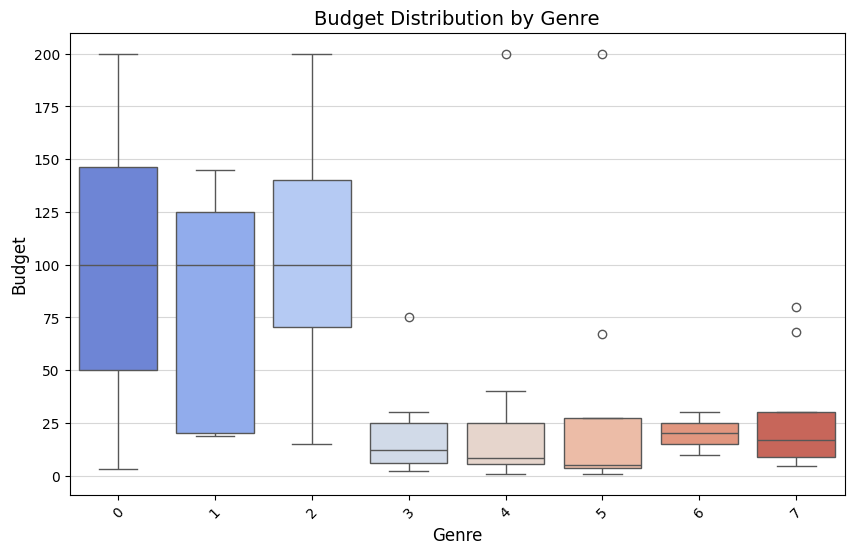

In [ ]:
# Visualize the relationship between Budget and Genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Budget', data=filtered_df, palette='coolwarm')
plt.title('Budget Distribution by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


Key Insights:
The boxplot clearly shows the relationship between Budget and Genre:

Higher-budget genres: Certain genres (e.g., likely Action, Adventure, or Fantasy) have higher budgets, with a wider range and prominent outliers.
Lower-budget genres: Other genres (e.g., likely Drama, Horror, or niche ones) tend to have significantly lower budgets and tighter distributions.

Here is the legend for the Genre values:

0: Action
1: Animation
2: Adventure
3: Crime
4: Comedy
5: Drama
6: Horror
7: Fantasy

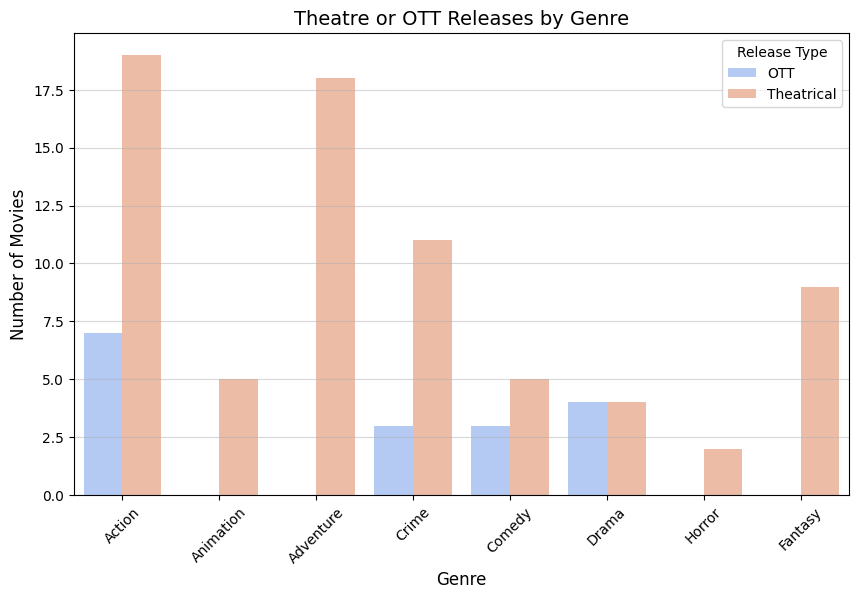

In [ ]:
# Analyze the relationship between Theatre or OTT and Genre using a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', hue='THEATRE OR OTT', data=filtered_df, palette='coolwarm')
plt.title('Theatre or OTT Releases by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.legend(title='Release Type', labels=['OTT', 'Theatrical'])

# Define genre_mapping (assuming your Genre values are 0-7 as per your previous comments)
genre_mapping = {
    0: 'Action',
    1: 'Animation',
    2: 'Adventure',
    3: 'Crime',
    4: 'Comedy',
    5: 'Drama',
    6: 'Horror',
    7: 'Fantasy'
}

plt.xticks(ticks=range(len(genre_mapping)), labels=genre_mapping.values(), rotation=45) # Now genre_mapping is defined
plt.grid(axis='y', alpha=0.5)
plt.show()

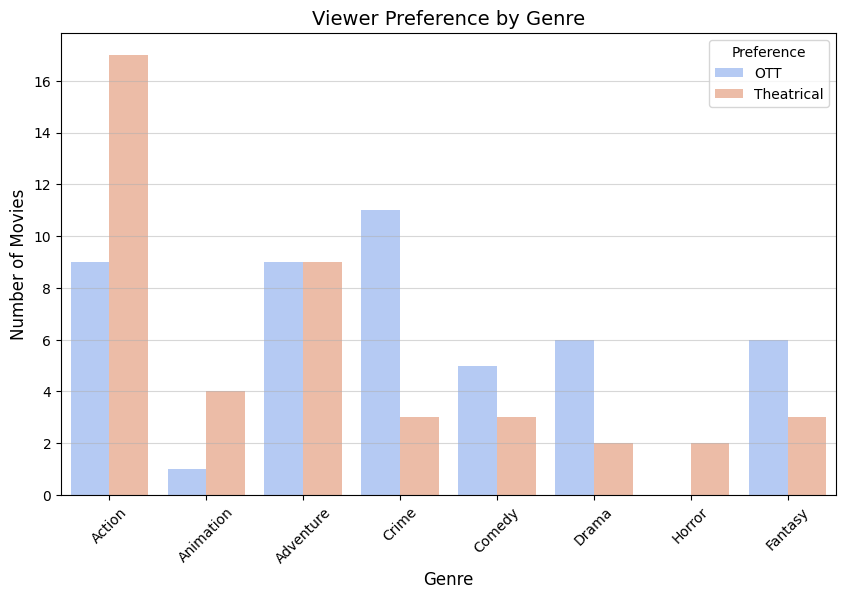

In [ ]:
# Analyze the relationship between Genre and Viewer Preference using a count plot
genre_mapping = {
    0: 'Action',
    1: 'Animation',
    2: 'Adventure',
    3: 'Crime',
    4: 'Comedy',
    5: 'Drama',
    6: 'Horror',
    7: 'Fantasy'
}

plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', hue='PREFERENCE', data=filtered_df, palette='coolwarm')
plt.title('Viewer Preference by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.legend(title='Preference', labels=['OTT', 'Theatrical'])
plt.xticks(ticks=range(len(genre_mapping)), labels=genre_mapping.values(), rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


<ipython-input-23-75fad297c40a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PREFERENCE', y='HOD', data=filtered_df, palette='coolwarm', inner="quartile")


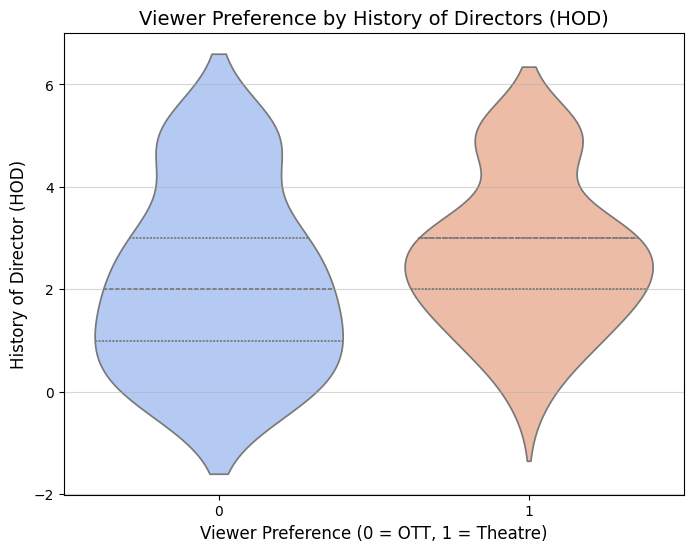

In [ ]:
# Visualize the relationship between Viewer Preference and History of Director (HOD) using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='PREFERENCE', y='HOD', data=filtered_df, palette='coolwarm', inner="quartile")
plt.title('Viewer Preference by History of Directors (HOD)', fontsize=14)
plt.xlabel('Viewer Preference (0 = OTT, 1 = Theatre)', fontsize=12)
plt.ylabel('History of Director (HOD)', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()


Theatrical Preference (1):
The distribution is broader, with a significant concentration of movies involving directors with mid-to-high experience levels. Outliers indicate occasional involvement of very experienced directors.
OTT Preference (0):
A tighter distribution centered around lower experience levels, suggesting that OTT movies typically involve less experienced directors.

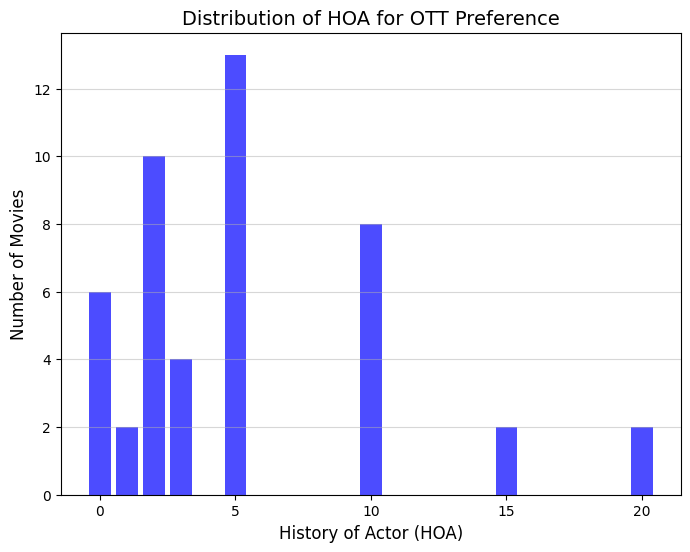

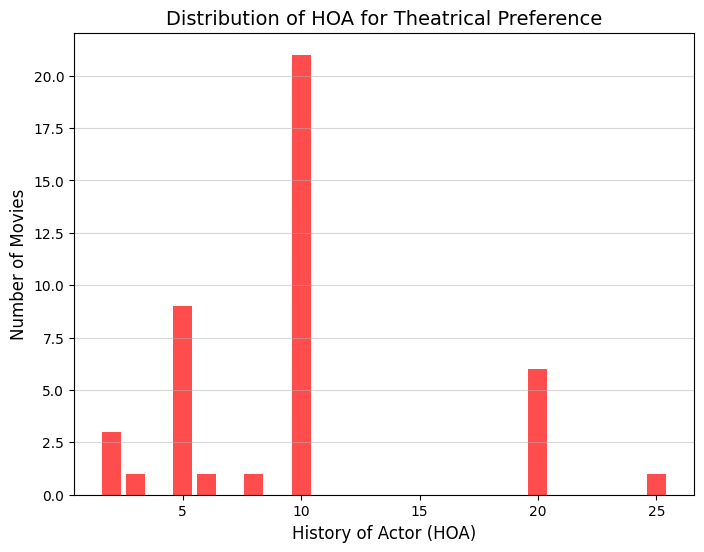

In [ ]:
# Filter the dataset based on Viewer Preference (OTT and Theatrical)
ott_preference = filtered_df[filtered_df['PREFERENCE'] == 0]
theatrical_preference = filtered_df[filtered_df['PREFERENCE'] == 1]

# Plot distribution of HOA (History of Actor) for OTT Preference
plt.figure(figsize=(8, 6))
ott_hoa_counts = ott_preference['HOA'].value_counts().sort_index()
plt.bar(ott_hoa_counts.index, ott_hoa_counts.values, color='blue', alpha=0.7)
plt.title('Distribution of HOA for OTT Preference', fontsize=14)
plt.xlabel('History of Actor (HOA)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot distribution of HOA (History of Actor) for Theatrical Preference
plt.figure(figsize=(8, 6))
theatrical_hoa_counts = theatrical_preference['HOA'].value_counts().sort_index()
plt.bar(theatrical_hoa_counts.index, theatrical_hoa_counts.values, color='red', alpha=0.7)
plt.title('Distribution of HOA for Theatrical Preference', fontsize=14)
plt.xlabel('History of Actor (HOA)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()


OTT Preference:

Movies preferred on OTT platforms are mostly associated with actors having lower experience (HOA values between 1 and 5).
Few movies feature highly experienced actors on OTT.
Theatrical Preference:

Theatrical movies display a broader distribution, with notable peaks at higher HOA values (e.g., 10+), indicating the reliance on experienced actors for theatrical releases.

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare the dataset for Apriori by one-hot encoding relevant categorical columns
# Include all categorical columns that you want to analyze in the Apriori algorithm
filtered_df['Budget_High'] = (filtered_df['Budget'] > filtered_df['Budget'].median()).astype(int)
filtered_df['HOA_High'] = (filtered_df['HOA'] > filtered_df['HOA'].median()).astype(int)
filtered_df['HOD_High'] = (filtered_df['HOD'] > filtered_df['HOD'].median()).astype(int)
#Then include these new columns in apriori_data:
# One-hot encode categorical features within the selected columns
apriori_data = pd.get_dummies(filtered_df[['Genre', 'PREFERENCE', 'Season', 'Budget_High', 'HOA_High', 'HOD_High']],
                              columns=['Genre', 'PREFERENCE', 'Season'], # Specify columns to one-hot encode
                              drop_first=True)  #To avoid redundancy


# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(apriori_data, min_support=0.2, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, support_only=False, num_itemsets=len(frequent_itemsets))

# Sort and display the results
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=False)

# Print results
print("Frequent Itemsets:")
print(frequent_itemsets_sorted)

print("\nAssociation Rules:")
print(rules_sorted)

Frequent Itemsets:
     support                     itemsets
0   0.488889                (Budget_High)
4   0.477778               (PREFERENCE_1)
1   0.466667                   (HOA_High)
2   0.444444                   (HOD_High)
5   0.366667                   (Season_1)
12  0.333333     (PREFERENCE_1, HOA_High)
9        0.3  (PREFERENCE_1, Budget_High)
6   0.255556                   (Season_2)
8   0.255556      (HOD_High, Budget_High)
14  0.244444     (PREFERENCE_1, HOD_High)
7   0.233333      (Budget_High, HOA_High)
11  0.233333         (HOD_High, HOA_High)
15  0.222222     (PREFERENCE_1, Season_1)
13  0.211111         (Season_1, HOA_High)
3        0.2                    (Genre_2)
10       0.2      (Season_1, Budget_High)

Association Rules:
      antecedents     consequents  antecedent support  consequent support  \
3      (HOA_High)  (PREFERENCE_1)            0.466667            0.477778   
2  (PREFERENCE_1)      (HOA_High)            0.477778            0.466667   
0  (PREFERENCE_1

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# filtered_df['Budget_High'] = (filtered_df['Budget'] > filtered_df['Budget'].median()).astype(int)
# filtered_df['HOA_High'] = (filtered_df['HOA'] > filtered_df['HOA'].median()).astype(int)
# filtered_df['HOD_High'] = (filtered_df['HOD'] > filtered_df['HOD'].median()).astype(int)
# Then include these new columns in apriori_data:
# apriori_data = pd.get_dummies(filtered_df[['Genre', 'PREFERENCE', 'Season', 'Budget_High', 'HOA_High', 'HOD_High']], drop_first=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Data Preparation
# Categorize columns (e.g., HOA, Budget, Genre)
df['HOA_High'] = df['HOA'] > df['HOA'].median()
df['Budget_High'] = df['Budget'] > df['Budget'].median()

# Combine relevant factors
df['HOA_Budget_Genre'] = (
    df['HOA_High'].astype(str) + "_" +
    df['Budget_High'].astype(str) + "_" +
    df['Genre']
)

# Step 2: One-hot encode relevant columns
apriori_data = pd.get_dummies(df[['HOA_Budget_Genre', 'PREFERENCE']], drop_first=False).astype(bool)

# Step 3: Apply Apriori algorithm
frequent_itemsets = apriori(apriori_data, min_support=0.1, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5,support_only=False, num_itemsets=len(frequent_itemsets))  # Add num_itemsets)

# Filter rules with 'PREFERENCE_T' as the consequent
rules_filtered = rules[rules['consequents'].apply(lambda x: 'PREFERENCE_T' in str(x))]

# Step 5: Output results
print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False))

print("\nAssociation Rules with Consequent 'PREFERENCE_T':")
print(rules_filtered.sort_values(by=['confidence', 'lift'], ascending=False))


Frequent Itemsets:
    support                                           itemsets
3  0.515152                                     (PREFERENCE_T)
2  0.484848                                     (PREFERENCE_O)
1  0.121212                (HOA_Budget_Genre_True_True_Action)
4  0.111111  (HOA_Budget_Genre_True_True_Action, PREFERENCE_T)
0  0.101010               (HOA_Budget_Genre_False_True_Action)

Association Rules with Consequent 'PREFERENCE_T':
                           antecedents     consequents  antecedent support  \
0  (HOA_Budget_Genre_True_True_Action)  (PREFERENCE_T)            0.121212   

   consequent support   support  confidence      lift  representativity  \
0            0.515152  0.111111    0.916667  1.779412               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.048669    5.818182       0.498433  0.211538   0.828125    0.566176  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-859b88122736>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_df[


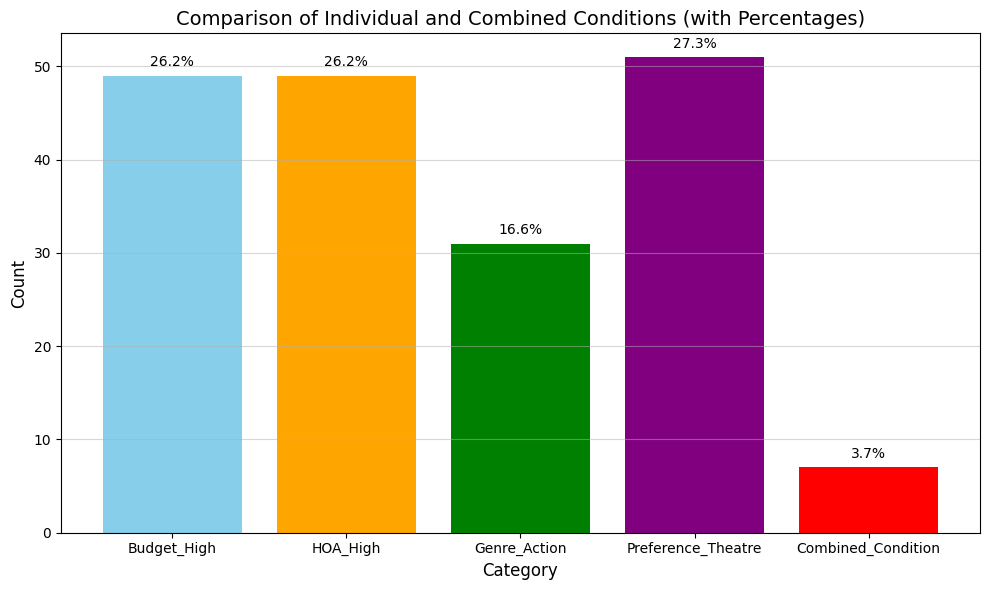

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset based on conditions
filtered_data = filtered_df[
    (df['Budget'] > df['Budget'].median()) &
    (df['HOA'] > df['HOA'].median()) &
    (df['Genre'] == 'Action') &
    (df['PREFERENCE'] == 'T')
]

# Count the occurrences of each condition separately for comparison
budget_high_count = len(df[df['Budget'] > df['Budget'].median()])
hoa_high_count = len(df[df['HOA'] > df['HOA'].median()])
genre_action_count = len(df[df['Genre'] == 'Action'])
preference_theatre_count = len(df[df['PREFERENCE'] == 'T'])

# Create a summary DataFrame for visualization
summary_data = {
    'Category': ['Budget_High', 'HOA_High', 'Genre_Action', 'Preference_Theatre', 'Combined_Condition'],
    'Count': [
        budget_high_count,
        hoa_high_count,
        genre_action_count,
        preference_theatre_count,
        len(filtered_data)  # Combined condition
    ]
}
summary_df = pd.DataFrame(summary_data)

# Calculate percentages for combined condition as a proportion of individual conditions
summary_df['Percentage'] = (summary_df['Count'] / summary_df['Count'].sum()) * 100

# Plot the bar chart with percentages annotated above each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_df['Category'], summary_df['Count'], color=['skyblue', 'orange', 'green', 'purple', 'red'])

# Annotate percentages above each bar
for bar, percentage in zip(bars, summary_df['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', fontsize=10)

plt.title('Comparison of Individual and Combined Conditions (with Percentages)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


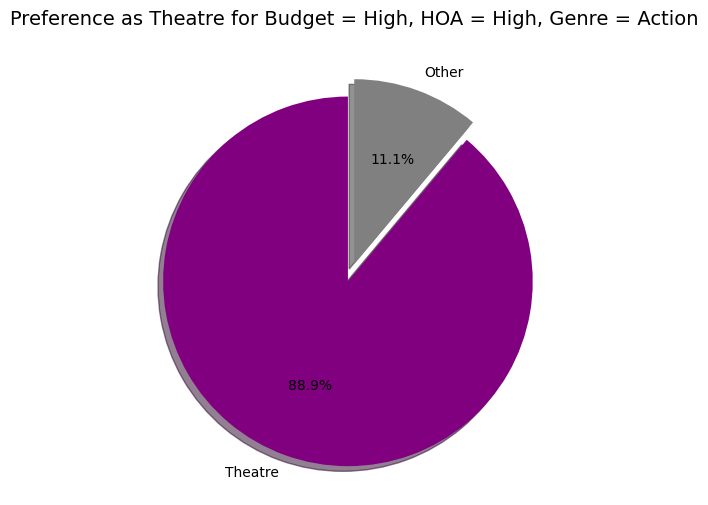

In [ ]:
# Ensure filtering logic matches the Apriori antecedent
condition_data = filtered_df[
    (filtered_df['Budget'] > filtered_df['Budget'].median()) &
    (filtered_df['HOA'] > filtered_df['HOA'].median()) &
    (filtered_df['Genre'] == 0) # Change 'Action' to 0 (assuming Genre is label encoded)
]

# Count total and theatre preferences within the filtered dataset
total_condition_count = len(condition_data)
theatre_preference_count = len(condition_data[condition_data['PREFERENCE'] == 1]) # Change 'T' to 1

# Adjust the percentage calculation
if total_condition_count > 0:
    theatre_preference_percentage = (theatre_preference_count / total_condition_count) * 100
    other_percentage = 100 - theatre_preference_percentage
else:
    theatre_preference_percentage = 0
    other_percentage = 0

# Visualization: Pie chart
labels = ['Theatre', 'Other']
sizes = [theatre_preference_percentage, other_percentage]
colors = ['purple', 'grey']
explode = (0.1, 0)  # Explode the Theatre slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Preference as Theatre for Budget = High, HOA = High, Genre = Action', fontsize=14)
plt.show()